In [1]:
from b2analysis import Histogram
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/06


Create some random data following a normal distribution:

In [2]:
data = np.random.normal(0,2,10000)

Create a histogramm with 100 bins and plot it:

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: ylabel='events'>)

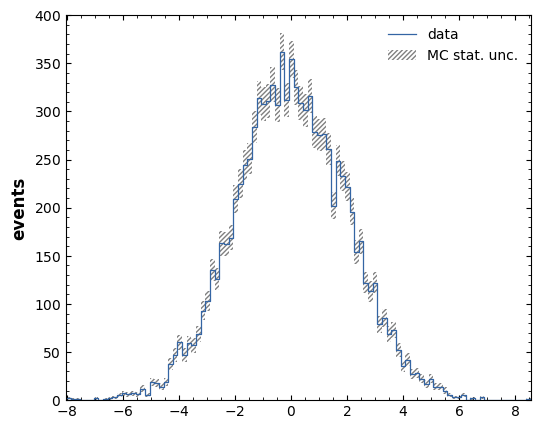

In [6]:
hist1 = Histogram("data", data, 0, bins=100)
hist1.plot(histtype="step")

Create a histogram with 100 bins in a given range showing the overlow and underflow bin:

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: ylabel='events'>)

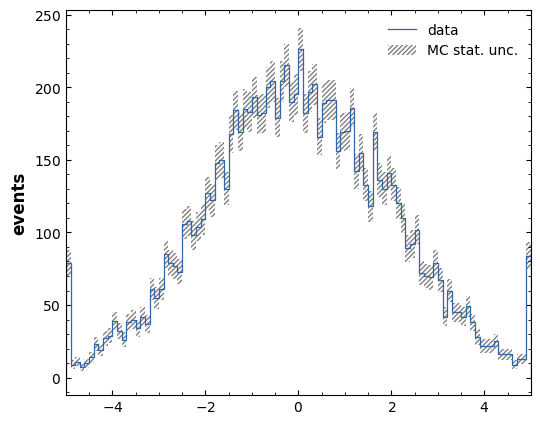

In [5]:
hist2 = Histogram("data", data, 0, range=(-5,5), overflow_bin=True, bins=100)
hist2.plot(histtype="step")